In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Zad.

Narysuj dane iris data wybierając dwie pierwsze współrzędne.

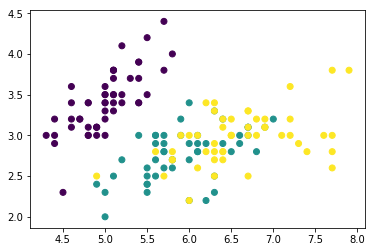

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data  # we only take the first two features.
y = iris.target

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [3]:
X.shape

(150, 4)

## Zad.

Wykonaj algorytm k-means na danych iris z grupami $k=1,\ldots,20$ i narysuj wykres zależności miar

```python
metrics.homogeneity_score
metrics.completeness_score
metrics.v_measure_score
metrics.adjusted_rand_score
metrics.adjusted_mutual_info_score
```

od ilośi klastrów.

In [4]:
from sklearn import metrics

In [5]:
SSE_array = [None]
homogeneity_score_array = [None]
completeness_score_array = [None]
v_measure_score_array = [None]
adjusted_rand_score_array = [None]
adjusted_mutual_info_score_array = [None]
silhouette_score_array = [None]
    
for i in range(1,21):
    km = KMeans(n_clusters=i, n_init=10)
    y_km = km.fit_predict(X)
    SSE_array.append(km.inertia_)
    
    homogeneity_score_array.append(metrics.homogeneity_score(y, y_km))
    completeness_score_array.append(metrics.completeness_score(y, y_km))
    v_measure_score_array.append(metrics.v_measure_score(y, y_km))
    adjusted_rand_score_array.append(metrics.adjusted_rand_score(y, y_km))
    adjusted_mutual_info_score_array.append(metrics.adjusted_mutual_info_score(y,  y_km))
    


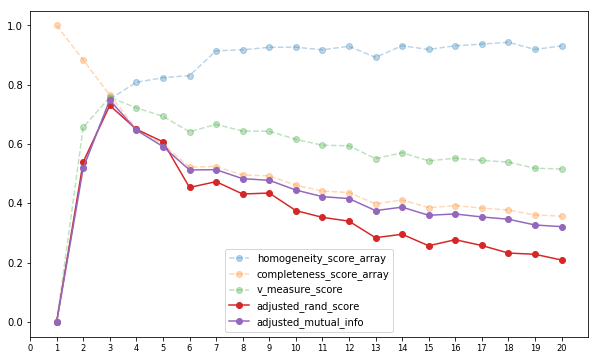

In [6]:
t=range(0,21)
plt.figure(figsize=(10,6));
# plt.plot(SSE_array)
plt.plot( homogeneity_score_array, "o--", label="homogeneity_score_array", alpha = 0.3)
plt.plot( completeness_score_array, "o--", label="completeness_score_array", alpha = 0.3)
plt.plot( v_measure_score_array, "o--", label="v_measure_score", alpha = 0.3)
plt.plot( adjusted_rand_score_array, "o-", label="adjusted_rand_score")
plt.plot( adjusted_mutual_info_score_array, "o-", label="adjusted_mutual_info")
plt.xlim(0,21)
plt.xticks(range(len(t)), t, size='small')
plt.legend()
plt.show()

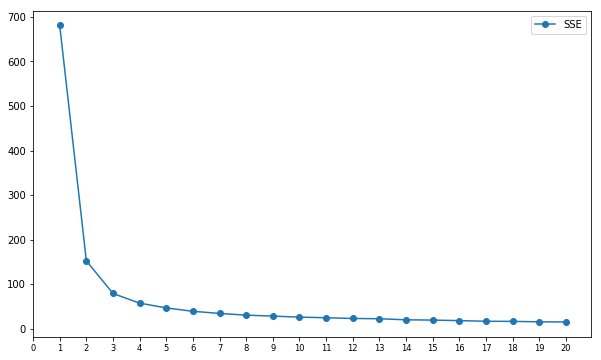

In [7]:
plt.figure(figsize=(10,6));
plt.plot(SSE_array, "o-", label="SSE")
plt.xticks(range(len(t)), t, size='small')
plt.legend()
plt.show()

# Zad.
Wykonaj algorytm z k=3 oraz zwizualizuj wyniki:

  * wszystkie miary dopasowania
  * crosstab

In [8]:
km = KMeans(n_clusters=3, n_init=10)
y_km = km.fit_predict(X)

In [9]:
pd.crosstab(y,y_km)

col_0,0,1,2
row_0,,,
0,0,50,0
1,2,0,48
2,36,0,14


In [10]:
print(metrics.adjusted_rand_score(y, y_km))
print(metrics.adjusted_mutual_info_score(y,  y_km))

0.7302382722834697
0.7483723933229484


# Zad.

Zwizualizuj wyniki grupowania w 2D za pomocą

* PCA
* t-SNE

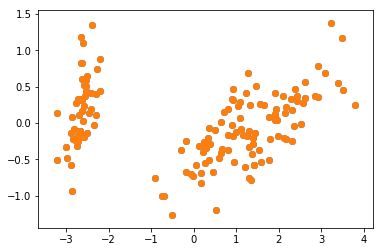

In [14]:
from sklearn.decomposition import PCA
from matplotlib import colors as mcolors

# build a PCA model
pca = PCA(n_components=2)
pca.fit(X)
# transform the digits data onto the first two principal components
X_pca = pca.transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])
plt.show()

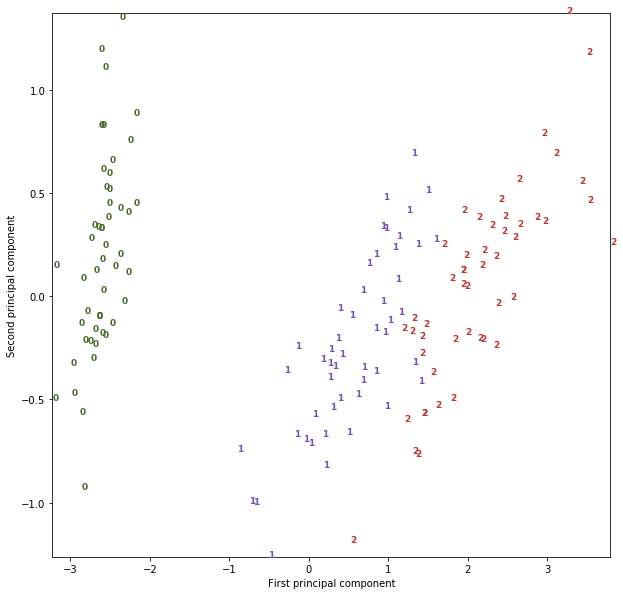

In [11]:
from sklearn.decomposition import PCA
from matplotlib import colors as mcolors

# build a PCA model
pca = PCA(n_components=2)
pca.fit(X)
# transform the digits data onto the first two principal components
X_pca = pca.transform(X)
#colors = list(mcolors.CSS4_COLORS)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

plt.figure(figsize=(10, 10))
plt.xlim(X_pca[:, 0].min(), X_pca[:, 0].max())
plt.ylim(X_pca[:, 1].min(), X_pca[:, 1].max())
for i in range(len(X)):
    # actually plot the digits as text instead of using scatter
    plt.text(X_pca[i, 0], X_pca[i, 1], str(y[i]),
             color = colors[y[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

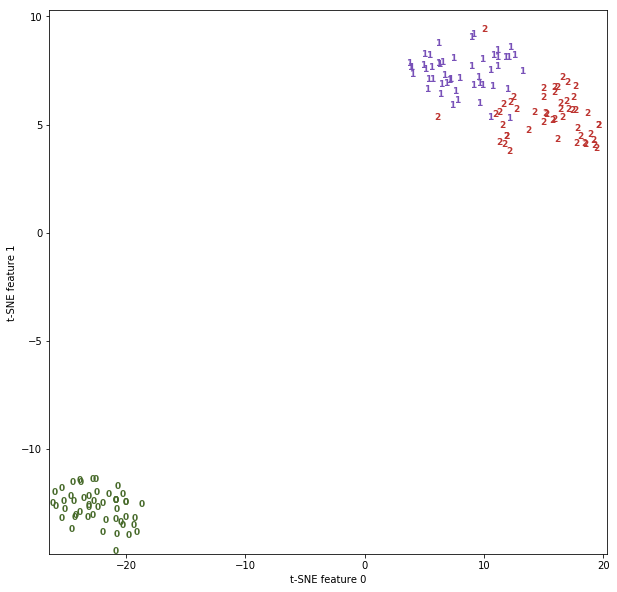

In [12]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(10, 10))
plt.xlim(X_tsne[:, 0].min(), X_tsne[:, 0].max() + 1)
plt.ylim(X_tsne[:, 1].min(), X_tsne[:, 1].max() + 1)
for i in range(len(X)):
    # actually plot the digits as text instead of using scatter
    plt.text(X_tsne[i, 0], X_tsne[i, 1], str(y[i]),
             color = colors[y[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")
plt.show()